# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [30]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
y_test_label = y_test

The shape of training set (50000, 32, 32, 3)
The shape of training label set (50000, 1)
The shape of test set (10000, 32, 32, 3)
The shape of test label set (10000, 1)
All images have the same dimensions
Number of classes in training set: 100
Number of classes in test set: 100
Displaying 5 examples from the training set


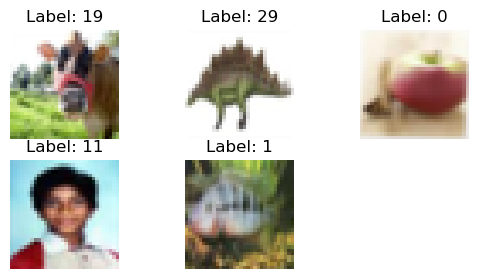

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# The shape of training and test sets
print(f"The shape of training set {x_train.shape}")
print(f"The shape of training label set {y_train.shape}")
print(f"The shape of test set {x_test.shape}")
print(f"The shape of test label set {y_test.shape}")

# Check that all images have the same dimensions
for idx, img in enumerate(x_train):
    if img.shape != (32, 32, 3):
        print(f"Image {idx} has different dimensions: {img.shape}")
print("All images have the same dimensions")

# Number of unique classes:
unique_classes_train = np.unique(y_train)
print(f"Number of classes in training set: {len(unique_classes_train)}")
unique_classes_test = np.unique(y_test)
print(f"Number of classes in test set: {len(unique_classes_test)}")

# Displaying 5 examples from the training set
print("Displaying 5 examples from the training set")
for i in range(5):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [32]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalizing the images so they all have pixel values in the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Converting the labels to one-hot encoded vectors:
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Splitting the training set into training and validation sets (20% for validation)
x2_train, x_val, y2_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [33]:
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense

model_input = shape=(32, 32, 3)
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=model_input),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

baseline_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 256)              

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [34]:
from keras import optimizers
from tensorflow.keras.optimizers import SGD

baseline_model.compile(
    loss='categorical_crossentropy', 
    optimizer=SGD(learning_rate=0.01, momentum=0.8),
    metrics=['acc'],
    loss_weights=1.
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [35]:
history = baseline_model.fit(x2_train, y2_train,batch_size=32, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
1250/1250 [==============================] - 17s 13ms/step - loss: 4.3881 - acc: 0.0381 - val_loss: 3.9781 - val_acc: 0.0977
Epoch 2/15
1250/1250 [==============================] - 15s 12ms/step - loss: 3.9151 - acc: 0.0986 - val_loss: 3.6394 - val_acc: 0.1512
Epoch 3/15
1250/1250 [==============================] - 15s 12ms/step - loss: 3.6517 - acc: 0.1391 - val_loss: 3.3617 - val_acc: 0.1969
Epoch 4/15
1250/1250 [==============================] - 16s 13ms/step - loss: 3.4475 - acc: 0.1759 - val_loss: 3.2364 - val_acc: 0.2179
Epoch 5/15
1250/1250 [==============================] - 17s 14ms/step - loss: 3.2770 - acc: 0.2079 - val_loss: 3.0675 - val_acc: 0.2474
Epoch 6/15
1250/1250 [==============================] - 17s 13ms/step - loss: 3.1432 - acc: 0.2304 - val_loss: 2.9534 - val_acc: 0.2745
Epoch 7/15
1250/1250 [==============================] - 17s 14ms/step - loss: 3.0330 - acc: 0.2520 - val_loss: 2.8495 - val_acc: 0.2948
Epoch 8/15
1250/1250 [==========================

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [36]:
from sklearn.metrics import roc_auc_score
test_loss, test_accuracy = baseline_model.evaluate(x_test, y_test, verbose=1)
predicted_probabilities = baseline_model.predict(x_test)
roc_auc = roc_auc_score(y_test, predicted_probabilities, multi_class='ovr')
print(f"Accuracy: {test_accuracy}")
print("Other metric: AUC ROC")
print("Reason for selection: AUC ROC evaluates how well the model distinguishes between each class and all others")
print(f"Value of metric: {roc_auc}")
print("Interpretation of metric value: The higher the better")

313/313 [==============================] - 2s 5ms/step
Accuracy: 0.36579999327659607
Other metric: AUC ROC
Reason for selection: AUC ROC evaluates how well the model distinguishes between each class and all others
Value of metric: 0.9366377272727273
Interpretation of metric value: The higher the better


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

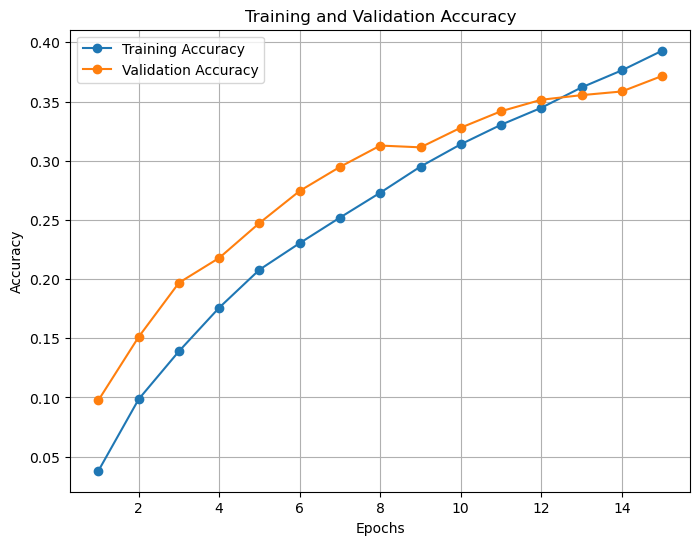

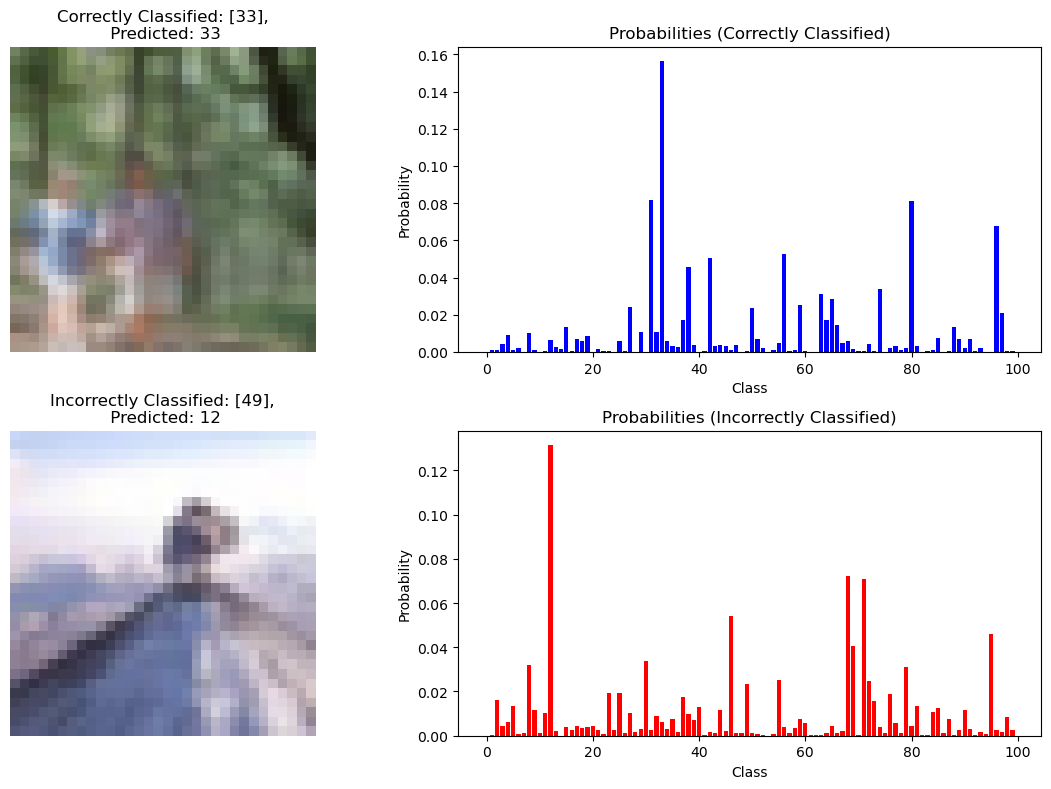

Discussing the results: 
1. The plots illustrate the model's predicted probability distribution across 100 classes for a provided image.
2. The results are logical, as the model demonstrates its ability to generate classification probabilities. For the case where the image was correctly classified the selected class has significantly higher probability comparing for the case with the incorrectly classified image.
3. Classification probabilities indicate the model's confidence in predicting that an input belongs to each possible class.


In [37]:
import numpy as np
import matplotlib.pyplot as plt

train_accuracy = history.history['acc']  # Training accuracy
val_accuracy = history.history['val_acc']  # Validation accuracy
epochs = range(1, len(train_accuracy) + 1)  # Epoch numbers

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Selecting correctly and incorrectly classified images:
predicted_classes = predicted_probabilities.argmax(axis=1)
y_test_indices = np.argmax(y_test, axis=1)
correct_indices = np.where(predicted_classes == y_test_indices)[0]
incorrect_indices = np.where(predicted_classes != y_test_indices)[0]
# examples for correctly and incorrectly classified images:
correct_example_idx = correct_indices[0]
incorrect_example_idx = incorrect_indices[0]

# Correctly classified example
correct_image = x_test[correct_example_idx]
correct_label = y_test[correct_example_idx]
correct_probs = predicted_probabilities[correct_example_idx]

# Incorrectly classified example
incorrect_image = x_test[incorrect_example_idx]
incorrect_label = y_test[incorrect_example_idx]
incorrect_probs = predicted_probabilities[incorrect_example_idx]

# Plotting:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Correctly classified image
axes[0, 0].imshow(correct_image)
axes[0, 0].set_title(f"Correctly Classified: {y_test_label[correct_example_idx]},\n Predicted: {predicted_classes[correct_example_idx]}")
axes[0, 0].axis('off')

# Probabilities for the correctly classified image
axes[0, 1].bar(range(len(correct_probs)), correct_probs, color='blue')
axes[0, 1].set_title("Probabilities (Correctly Classified)")
axes[0, 1].set_xlabel("Class")
axes[0, 1].set_ylabel("Probability")

# Incorrectly classified image
axes[1, 0].imshow(incorrect_image)
axes[1, 0].set_title(f"Incorrectly Classified: {y_test_label[incorrect_example_idx]},\n Predicted: {predicted_classes[incorrect_example_idx]}")
axes[1, 0].axis('off')

# Probabilities for the incorrectly classified image
axes[1, 1].bar(range(len(incorrect_probs)), incorrect_probs, color='red')
axes[1, 1].set_title("Probabilities (Incorrectly Classified)")
axes[1, 1].set_xlabel("Class")
axes[1, 1].set_ylabel("Probability")

plt.tight_layout()
plt.show()

# Discussing the results
print("Discussing the results: ")
print("1. The plots illustrate the model's predicted probability distribution across 100 classes for a provided image.")
print("2. The results are logical, as the model demonstrates its ability to generate classification probabilities. For the case where the image was correctly classified the selected class has significantly higher probability comparing for the case with the incorrectly classified image.")
print("3. Classification probabilities indicate the model's confidence in predicting that an input belongs to each possible class.")


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [43]:
from tensorflow.keras.layers import BatchNormalization

enhanced_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=model_input),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

baseline_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 256)              

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/15
1250/1250 [==============================] - 294s 234ms/step - loss: 4.3798 - acc: 0.0503 - val_loss: 4.1033 - val_acc: 0.0781
Epoch 2/15
1250/1250 [==============================] - 231s 185ms/step - loss: 3.9921 - acc: 0.0940 - val_loss: 3.6864 - val_acc: 0.1284
Epoch 3/15
1250/1250 [==============================] - 242s 194ms/step - loss: 3.7618 - acc: 0.1297 - val_loss: 3.4436 - val_acc: 0.1839
Epoch 4/15
1250/1250 [==============================] - 248s 198ms/step - loss: 3.5355 - acc: 0.1655 - val_loss: 3.2926 - val_acc: 0.2003
Epoch 5/15
1250/1250 [==============================] - 248s 198ms/step - loss: 3.2823 - acc: 0.2090 - val_loss: 2.8542 - val_acc: 0.2851
Epoch 6/15
1250/1250 [==============================] - 247s 198ms/step - loss: 3.0277 - acc: 0.2507 - val_loss: 2.7208 - val_acc: 0.3195
Epoch 7/15
1250/1250 [==============================] - 248s 198ms/step - loss: 2.7663 - acc: 0.2969 - val_loss: 2.4511 - val_acc: 0.3648
Epoch 8/15
1250/1250 [============

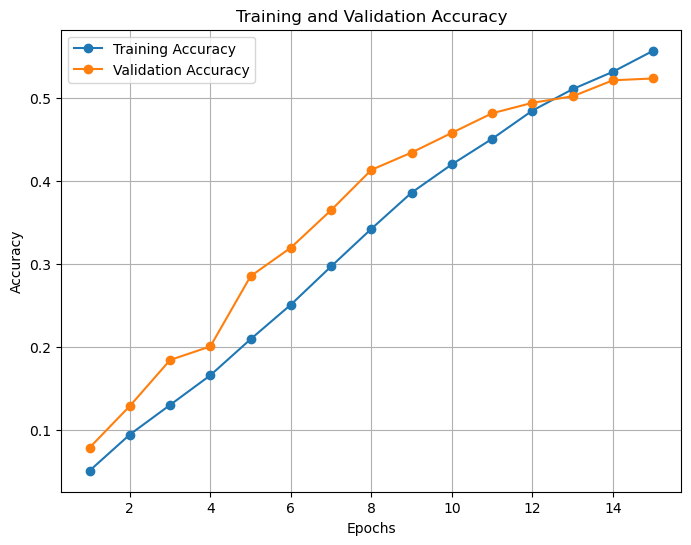

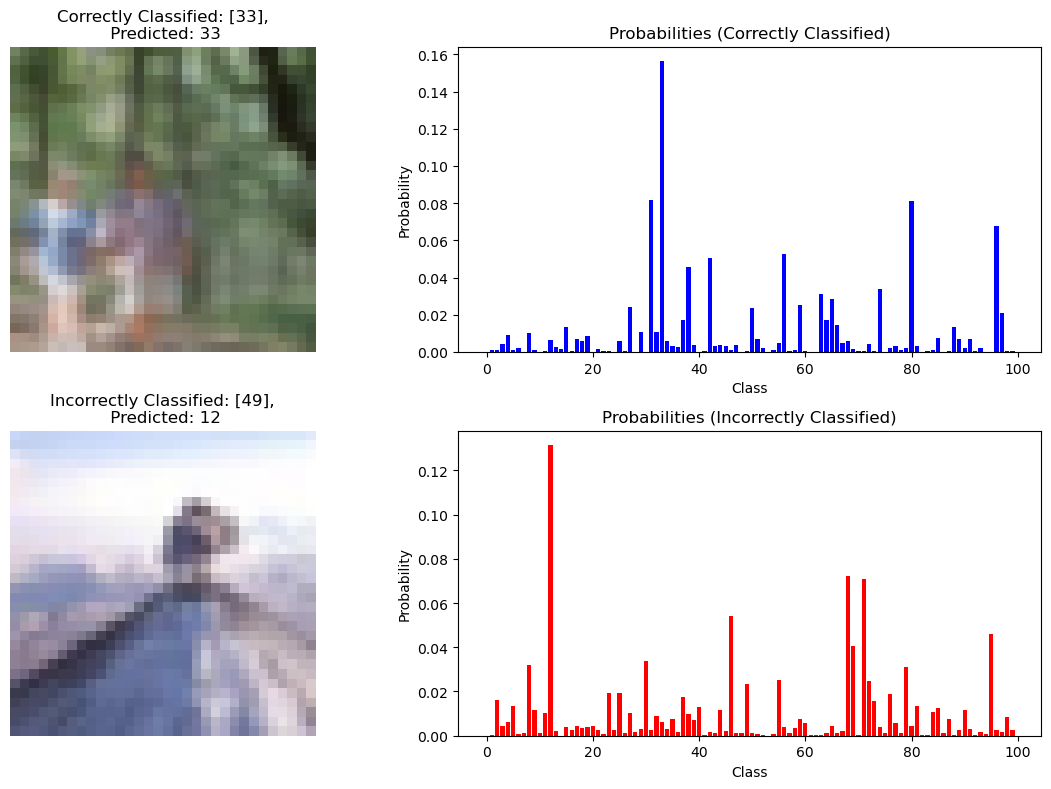

In [44]:
enhanced_model.compile(
    loss='categorical_crossentropy', 
    optimizer=SGD(learning_rate=0.01, momentum=0.8),
    metrics=['acc'],
    loss_weights=1.
)

history = enhanced_model.fit(x2_train, y2_train,batch_size=32, epochs=15, validation_data=(x_val, y_val))

train_accuracy = history.history['acc']  # Training accuracy
val_accuracy = history.history['val_acc']  # Validation accuracy
epochs = range(1, len(train_accuracy) + 1)  # Epoch numbers

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Selecting correctly and incorrectly classified images:
predicted_classes = predicted_probabilities.argmax(axis=1)
y_test_indices = np.argmax(y_test, axis=1)
correct_indices = np.where(predicted_classes == y_test_indices)[0]
incorrect_indices = np.where(predicted_classes != y_test_indices)[0]
# examples for correctly and incorrectly classified images:
correct_example_idx = correct_indices[0]
incorrect_example_idx = incorrect_indices[0]

# Correctly classified example
correct_image = x_test[correct_example_idx]
correct_label = y_test[correct_example_idx]
correct_probs = predicted_probabilities[correct_example_idx]

# Incorrectly classified example
incorrect_image = x_test[incorrect_example_idx]
incorrect_label = y_test[incorrect_example_idx]
incorrect_probs = predicted_probabilities[incorrect_example_idx]

# Plotting:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Correctly classified image
axes[0, 0].imshow(correct_image)
axes[0, 0].set_title(f"Correctly Classified: {y_test_label[correct_example_idx]},\n Predicted: {predicted_classes[correct_example_idx]}")
axes[0, 0].axis('off')

# Probabilities for the correctly classified image
axes[0, 1].bar(range(len(correct_probs)), correct_probs, color='blue')
axes[0, 1].set_title("Probabilities (Correctly Classified)")
axes[0, 1].set_xlabel("Class")
axes[0, 1].set_ylabel("Probability")

# Incorrectly classified image
axes[1, 0].imshow(incorrect_image)
axes[1, 0].set_title(f"Incorrectly Classified: {y_test_label[incorrect_example_idx]},\n Predicted: {predicted_classes[incorrect_example_idx]}")
axes[1, 0].axis('off')

# Probabilities for the incorrectly classified image
axes[1, 1].bar(range(len(incorrect_probs)), incorrect_probs, color='red')
axes[1, 1].set_title("Probabilities (Incorrectly Classified)")
axes[1, 1].set_xlabel("Class")
axes[1, 1].set_ylabel("Probability")

plt.tight_layout()
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
- I enhanced the model by adding additional convolutional layers and increasing the number of neurons in each layer. I also incorporated batch normalization after each convolutional layer to stabilize and accelerate training.
- These adjustments led to an improvement in performance, achieving a validation accuracy of 52%. It was mainly due to the increased depth with more convolutional layers as deeper networks can capture more complex features.
- I experimented further by tweaking the optimizer parameters (SGD), switching to the Adam optimizer, and increasing the number of neurons in each convolutional layer. However, these changes did not yield additional improvements. My hypothesis is that there is still room for enhancement.
- I suggest exploring further improvements by leveraging pre-trained models, increasing the number of epochs and batch size, and incorporating advanced techniques for optimization and regularization.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.